<a href="https://colab.research.google.com/github/lawrenceN/ASPBaseApp/blob/master/BIT_A_Model_for_Detecting_Phishing_Website_Attacks_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction of the Case Study

In this project, you will be filling in the role of a Business Analyst employed by an organization's cybersecurity section. In the organization employees have lately been receiving a lot of emails containing links to phishing websites. You task will be to developa machine learning model for predicting whether or not an email that contains a link to a website is a phishing website or not. 

Phishing attacks are considered to be one of the most common types of online security threats, and are capable of breaking into an organization's online security to as to extract confidential information like user passwords, financial informaiton and so on.

You first assignmeent as a newly on-boarded business Analyst is to build upon the following steps to develop a phishing website classifier:



1.   Load and understand a tabular dataset. You should be very comfortable working with tabular data. 
2.   Query the dataset get some interesting reports
3. Clean the dataset accordingly so that it is well-suited for the machine learning model
4. Build and train a machine learning model, using algorithms such as Logistic Regression and Neural Networks.
5. Perform hyperparameter tuning, using techniques such as random search.
6. Provide a report to the top managers on our proposed phishing website detection machine learning model.



## Tools to be Used



*   Loading and understanding the data >> pandas, numerical computing >> numpy
*   Plotting >> Matplotlib
*   For Logistic Regression Classifier >>> scikit- Learn 
*   Summarizing the results of the findings >> Wandb: (experiment tracking site)



## Loading and Understanding the Phishing Websites Dataset

In [3]:
# Importing the needed library 
import pandas as pd
import numpy as np


In [4]:
# Fix a random seed
np.random.seed(7)

In [5]:
# We then load the dataset
myData=pd.read_csv('/content/Phishing.csv')

In [6]:
# Inspect the head of the dataset
myData.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,1,1,-1,-1,0,-1,-1,-1,0,1,1,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,1,-1,1,0,1,-1,1,1,0,1,1,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,1,1,1,0,1,-1,1,1,0,1,1,1,1,1,-1,0,-1,1,0,1,-1


In [7]:
myData.tail()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,1,1,-1,-1,1,-1,1,1,0,-1,1,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,0,-1,1,1,0,1,1,1,1,-1,1,-1,-1,-1,1,-1,-1


The **head** function returns the first N (the number you supply to it) rows form the DataFrame. The sample function returns N(the number you supply to it) form the DataFrame. 

In [8]:
myData.sample(10) ### updating my notebook,,, starting in 5 minutes please///

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
6838,1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,0,1,1,1,1,-1,1,0,1,1,0,1,-1
6085,-1,-1,1,1,1,-1,0,-1,-1,1,1,1,1,0,-1,1,1,1,0,1,1,1,1,-1,1,-1,1,1,1,1,-1
8240,1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,-1,1,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,-1,0,1,-1
173,-1,-1,-1,1,-1,1,-1,1,-1,1,1,-1,-1,0,0,-1,1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,1
6664,-1,-1,-1,1,-1,-1,1,1,1,1,1,-1,-1,0,-1,1,1,-1,0,1,1,1,1,-1,-1,1,-1,-1,1,1,1
9373,1,-1,1,1,1,1,-1,1,-1,-1,-1,1,-1,1,0,-1,-1,1,0,1,1,-1,-1,-1,1,-1,-1,1,0,1,1
7703,-1,-1,1,1,1,1,1,1,-1,1,1,1,1,0,-1,1,1,1,0,1,1,1,1,-1,1,1,-1,1,1,1,1
7995,1,-1,1,1,1,-1,-1,-1,1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,-1,1,1,-1,1,1,1,-1
7951,-1,-1,-1,1,-1,1,0,1,-1,1,1,-1,1,0,0,-1,1,-1,0,1,1,1,1,-1,-1,1,-1,-1,1,1,1
6887,-1,-1,1,1,1,-1,0,-1,1,1,1,1,-1,-1,-1,-1,1,1,0,1,1,1,1,-1,1,0,-1,1,0,1,-1


The table is very large and does not fit in the regular display. As bussines Analyst you encounter several datasets that are very large and we need a way of displaying them. In such we use .T attribute.

In [9]:
myData.sample(10).T

,5059,2033,8508,1628,9973,3372,3390,3056,2635,245
having_IP_Address,-1,1,1,1,-1,-1,1,1,1,1
URL_Length,-1,-1,-1,-1,-1,1,1,-1,-1,-1
Shortining_Service,-1,1,1,1,1,-1,1,1,1,1
having_At_Symbol,1,-1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,1,-1,-1,-1,-1,1,-1,-1,-1
having_Sub_Domain,1,-1,0,0,-1,1,1,0,0,0
SSLfinal_State,1,1,0,1,0,1,1,1,1,-1
Domain_registeration_length,-1,1,1,-1,1,-1,-1,1,1,1
Favicon,1,1,1,1,1,1,-1,1,1,1


In [10]:
myData.head(10).T

,0,1,2,3,4,5,6,7,8,9
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1
Favicon,1,1,1,1,1,1,1,1,1,1


Our data is in form of DataFrame, which makes it very easy to investigate primary factors about the data. For example we can count the number of columns of the DataFrame. 

In [11]:
myData.shape

(11055, 31)

In [12]:
myData.size

342705

Sometimes the column names are anonymised for the sake of user privacy. It is possible to retrive the names of the columns by using the .columns command.

In [ ]:
myData.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

The labels of the dataset are presented in the Results column. We may want to identify whether we have a binary classification or a multiclass problem. 

In [13]:
myData['Result'].unique()

array([-1,  1])

The result shows that our problem is a binary problem. -1 represents a "phishing site" and 1 represents a "Normal site". The problem we want to solve is a binary kind of problem.

---



# Getting Useful Information from the Dataset

Lets look at how the the different classes in the dataset are distributed. We use the Counter class for this.

In [14]:
#import the Counter Class
from collections import Counter

In [15]:
classes=Counter(myData['Result'].values)

In [16]:
classes.most_common()

[(1, 6157), (-1, 4898)]

In [17]:
# We can use the DataFrame to show the results

In [18]:
class_dist= pd.DataFrame(classes.most_common(), columns=['Class','Num_Observations'])
class_dist

,Class,Num_Observations
0,1,6157
1,-1,4898


In [19]:
# A plot can also be used to convery the above information. 

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# stylize the plots
plt.style.use('ggplot')

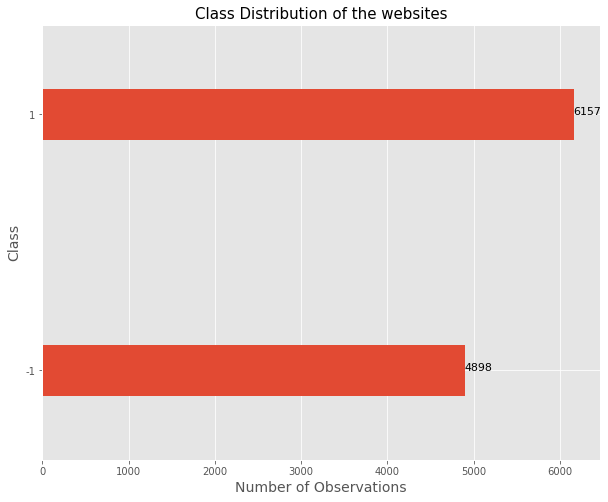

In [43]:
subplot=class_dist.groupby('Class')['Num_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))
subplot.set_title("Class Distribution of the websites", fontsize=15)
subplot.set_xlabel('Number of Observations', fontsize=14)
subplot.set_ylabel('Class', fontsize=14)
for i in subplot.patches:
  subplot.text(i.get_width() +0.1, i.get_y()+0.1,str(i.get_width()),fontsize=11)

In [44]:
# ask the questions,,, range of values present in the different columns. 
myData.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [45]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

# Query the dataset get some interesting reports

It is not good practice to build a machine learning model where the labels are encoded as negative values. This affectst the performance of the model. So we change the -1 to be 0


In [46]:
myData.rename(columns={'Result': 'Class'},inplace=True)

In [47]:
myData.head(3).T

,0,1,2
having_IP_Address,-1,1,1
URL_Length,1,1,0
Shortining_Service,1,1,1
having_At_Symbol,1,1,1
double_slash_redirecting,-1,1,1
Prefix_Suffix,-1,-1,-1
having_Sub_Domain,-1,0,-1
SSLfinal_State,-1,1,-1
Domain_registeration_length,-1,-1,-1
Favicon,1,1,1


In [48]:
type(myData)

pandas.core.frame.DataFrame

In [49]:
myData['Class']=myData['Class'].map({-1:0,1:1})

In [50]:
myData.head(3).T

,0,1,2
having_IP_Address,-1.0,1.0,1.0
URL_Length,1.0,1.0,0.0
Shortining_Service,1.0,1.0,1.0
having_At_Symbol,1.0,1.0,1.0
double_slash_redirecting,-1.0,1.0,1.0
Prefix_Suffix,-1.0,-1.0,-1.0
having_Sub_Domain,-1.0,0.0,-1.0
SSLfinal_State,-1.0,1.0,-1.0
Domain_registeration_length,-1.0,-1.0,-1.0
Favicon,1.0,1.0,1.0


In [51]:
myData['Class'].unique()

array([nan,  1.])

In [52]:
myData.isna().sum()

having_IP_Address                 0
URL_Length                        0
Shortining_Service                0
having_At_Symbol                  0
double_slash_redirecting          0
Prefix_Suffix                     0
having_Sub_Domain                 0
SSLfinal_State                    0
Domain_registeration_length       0
Favicon                           0
port                              0
HTTPS_token                       0
Request_URL                       0
URL_of_Anchor                     0
Links_in_tags                     0
SFH                               0
Submitting_to_email               0
Abnormal_URL                      0
Redirect                          0
on_mouseover                      0
RightClick                        0
popUpWidnow                       0
Iframe                            0
age_of_domain                     0
DNSRecord                         0
web_traffic                       0
Page_Rank                         0
Google_Index                

In [53]:
# you split the data in to training and testing data. 80:20 ratio
# =========================> 100% >>> 80%>>>train>>>20%>>testing (Accuracy, precision)
from sklearn.model_selection import train_test_split

In [54]:
x=myData.iloc[:,0:30].values.astype(int)
y=myData.iloc[:,30].values.astype(int)

In [55]:
type(x)

numpy.ndarray

In [56]:
x.shape

(11055, 30)

In [57]:
y.shape

(11055,)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=np.random.seed(7))

In [37]:
x_train.shape

(8844, 30)

# Training a Logistic Regression Model

Logistic Regresssion !!!


In [59]:
!pip install wandb

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 102kB 7.7MB/s 
     |████████████████████████████████| 122kB 18.7MB/s 
     |████████████████████████████████| 163kB 17.2MB/s 
     |████████████████████████████████| 102kB 8.2MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=30b2342b60e80ee1d1f6decc3ea86f965fbd034ba8babca54b3344fe1ca78068
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=d438116b6426aa67bd3f4f3382947ce039ae9bd1e8194dce7c5c5beea965329f
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8785 sha256=f2530d60ffb5465e53f48077409c34209d23a204c659b9

In [60]:
# We instantiate the Logistic Regression model and fit it to our training data
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,classification_report
from sklearn.linear_model import LogisticRegression
import wandb
import time

Define some utility function for training ML model with code to measure the training time and the performance of the model

In [61]:
def train_evel_pipeline(model,train_data,test_data, name):
  #Initialize the Weights and Biases
  wandb.init(project="Phishing Model Example", name=name)
  #segreget the datasets
  (x_train,y_train)=train_data
  (x_test,y_test)=test_data

  #Train the mdoe and log all the necessary metrics
  start=time.time()
  model.fit(x_train,y_train)
  end=time.time()-start
  prediction=model.predict(x_test)

  wandb.log({"accuracy": accuracy_score(y_test,prediction)*100.0,"precision": precision_recall_fscore_support(y_test,prediction,average='macro')[0],'recall': precision_recall_fscore_support(y_test,prediction, average='macro')[1], "training_time": end})
  print("Accuracy score of the Logistic Regression Classifier  with default hyperparameter values {0:.2f}%".format(accuracy_score(y_test,prediction)*100.))
  print("\n")
  print("---Classification report of the Logistic Regression Classifier with Default hyperParameter value ---")
  print("\n")
  print(classification_report(y_test,prediction,target_names=['Phishing websites','Normal Websites']))


In [62]:
logreg=LogisticRegression()
train_evel_pipeline(logreg,(x_train,y_train),(x_test,y_test),'logistic_regression')

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: lawrencenderu_mm (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.10.2
wandb: Run data is saved locally in wandb/run-20200922_053741-261c57dt
wandb: Syncing run logistic_regression



Accuracy score of the Logistic Regression Classifier  with default hyperparameter values 93.71%


---Classification report of the Logistic Regression Classifier with Default hyperParameter value ---


                   precision    recall  f1-score   support

Phishing websites       0.94      0.92      0.93       974
  Normal Websites       0.94      0.95      0.94      1237

         accuracy                           0.94      2211
        macro avg       0.94      0.94      0.94      2211
     weighted avg       0.94      0.94      0.94      2211



# Improving the Model

 We now tune the hyperparameters of the model to improve the model performance. 

In [67]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the grid of values
penalty = ["l1", "l2"]
C = [0.8, 0.9, 1.0]
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200, 250]

# Create a dictionary where tol and max_iter are keys and the lists
# of their values are the corresponding values
param_grid = dict(penalty=penalty, C=C, tol=tol, max_iter=max_iter)

# Instantiate RandomizedSearchCV with the required parameters
random_model = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5)

# Fit random_model to the data
random_model_result = random_model.fit(x_train, y_train)

# Summarize results
best_score, best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score: %.2f using %s" % (best_score*100., best_params))

config = wandb.config

config.tol = 0.001
config.penalty = "l2"
config.C = 1.0

# Train the model
logreg = LogisticRegression(tol=config.tol, penalty=config.penalty, max_iter=250, C=config.C)
train_evel_pipeline(logreg, (x_train, y_train),(x_test, y_test), "logistic-regression-random-search")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
wandb: Waiting for W&B process to finish, PID 829
wandb

Best score: 92.41 using {'tol': 0.0001, 'penalty': 'l2', 'max_iter': 100, 'C': 1.0}



wandb:                                                                                
wandb: Find user logs for this run at: wandb/run-20200922_055236-2ewtc11h/logs/debug.log
wandb: Find internal logs for this run at: wandb/run-20200922_055236-2ewtc11h/logs/debug-internal.log
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: 
wandb: Synced logistic-regression-random-search: https://wandb.ai/lawrencenderu_mm/Phishing%20Model%20Example/runs/2ewtc11h
wandb: Tracking run with wandb version 0.10.2
wandb: Run data is saved locally in wandb/run-20200922_055335-kmxbmbl6
wandb: Syncing run logistic-regression-random-search



Accuracy score of the Logistic Regression Classifier  with default hyperparameter values 93.71%


---Classification report of the Logistic Regression Classifier with Default hyperParameter value ---


                   precision    recall  f1-score   support

Phishing websites       0.94      0.92      0.93       974
  Normal Websites       0.94      0.95      0.94      1237

         accuracy                           0.94      2211
        macro avg       0.94      0.94      0.94      2211
     weighted avg       0.94      0.94      0.94      2211

